In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [2]:
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # este es import para windows


In [3]:
placa = []
image = cv2.imread('./public/img/jpg/auto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

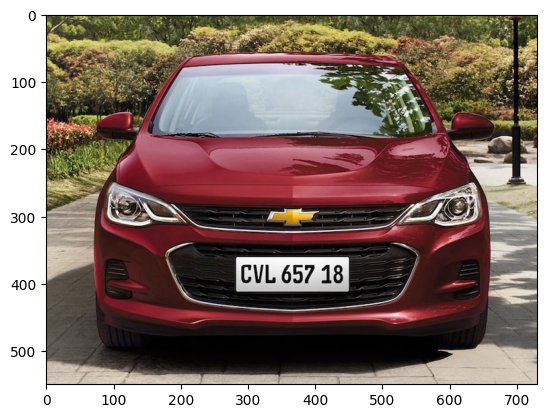

In [4]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

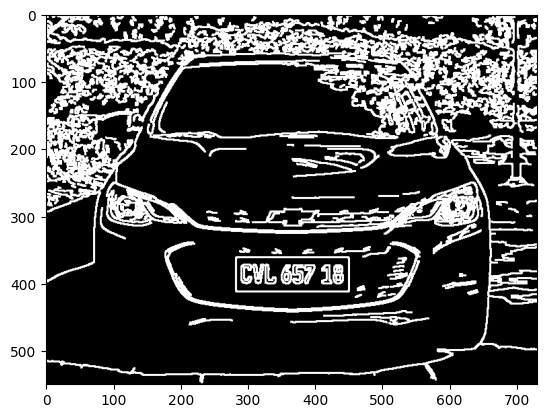

In [5]:
# nos vamos a enfocar en el rectangulo
gray = cv2.blur(gray, (3,3))
canny = cv2.Canny(gray, 130, 200)
canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny, cmap='gray');


In [ ]:
import re

# Deteccion de contornos de OpenCV

contorno, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# recorrer e imprimir todos los contornos
for c in contorno:
    area = cv2.contourArea(c)
    x_pos, y_pos, width, height = cv2.boundingRect(c)
    epsilon = 0.09*cv2.arcLength(c, True) # 0.09 es el porcentaje de error
    approx = cv2.approxPolyDP(c, epsilon, True) # aproximacion de poligonos

    if(len(approx) == 4 and area > 9000): # se refiere a 4 bordes
        aspect_ratio = float(width)/height
        print(f"area: {area}, x: {x_pos}, y: {y_pos}, width: {width}, height: {height}, aspect_ratio: {aspect_ratio}")
        # dibujar el contorno sobre la imagen original
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 3) # pintar de verde

        # recortar la imagen
        if(3 < aspect_ratio < 3.2): # aspect_ratio de una placa
            placa = gray[y_pos:y_pos+height, x_pos:x_pos+width]
            
            text = pytesseract.image_to_string(placa, config='--psm 11'.strip())
            
            print(f"Placa: {text}")
            cv2.rectangle(image, (x_pos, y_pos), (x_pos+width, y_pos+height), (0, 255, 0), 3)
            text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # eliminar caracteres que no sean letras o números
            cv2.putText(image, text, (x_pos-20, y_pos-10), 1, 2.2, (0, 255, 0), 3)



area: 9007.0, x: 281, y: 360, width: 171, height: 54, aspect_ratio: 3.1666666666666665
Placa: CVL 657 18



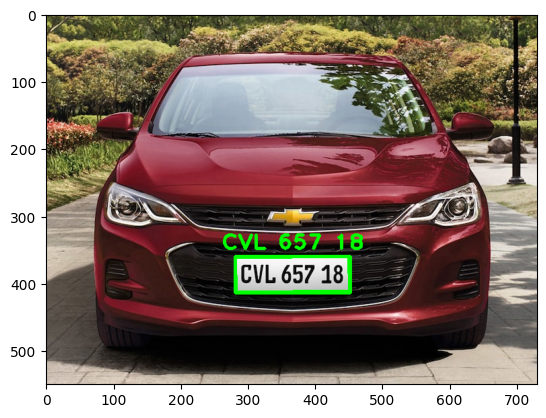

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));